In [1]:
# Requirements: numpy, pandas, scikit-learn, scikit-surprise, plotly

# Prevent codes being displayed when exporting to an HTML file
import IPython.core.display as di
di.display_html('<script>jQuery(function() {if (jQuery("body.notebook_app").length == 0) {jQuery(".input_area").toggle(); jQuery(".prompt").toggle();} jQuery(".highlight").show();});</script>', raw=True)

# Dynamically add a button to show/hide codes
di.display_html("<script>jQuery(function() {jQuery(function() {var b = jQuery('<input type=\"button\" value=\"Show/Hide codes\"/>'); b.click(function(){jQuery('.input_area').each(function(){jQuery(this).toggle();});}); jQuery('#References').parent().append(b);});});</script>", raw=True)

## References

## Load Dataset

In [2]:
# load from file
import pandas as pd
import numpy as np
filename = 'network_backup_dataset.csv'

#headers = ['Week #', 'Day of Week', 'Backup Start Time', 'Hour of Day', 
#           'Work-Flow-ID', 'File Name', 'Size of Backup (GB)', 'Backup Time (hour)']

#original data 
data = pd.read_csv(filename)
data.drop('Backup Time (hour)', axis = 1, inplace = True)
pre_gt = data['Size of Backup (GB)']
data.drop('Size of Backup (GB)', axis = 1, inplace = True)
#print(data.head(3))


In [3]:
scaler_enc_data = data # scaler encoding data
print(set(scaler_enc_data['Week #']))
print(set(scaler_enc_data['Backup Start Time - Hour of Day']))
print(set(scaler_enc_data['Day of Week']))

{1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15}
{1, 5, 9, 13, 17, 21}
{'Saturday', 'Sunday', 'Friday', 'Monday', 'Tuesday', 'Thursday', 'Wednesday'}


In [4]:
def scaler_encoding(): # 
    encoding_map = {'Monday': 1, 'Tuesday': 2, 'Wednesday': 3, 'Thursday': 4, 'Friday': 5, 'Saturday': 6, 'Sunday': 7}
    for row in range(len(scaler_enc_data)):
        # encode 'Day of Week'
        #print(need_enc_data.columns)
        scaler_enc_data.loc[row,'Day of Week'] = encoding_map[scaler_enc_data.loc[row,'Day of Week']]
        # encode 'Work-Flow-ID'
        scaler_enc_data.loc[row,'Work-Flow-ID'] = int(scaler_enc_data.loc[row,'Work-Flow-ID'][-1])
        # encode 'File Name'
        scaler_enc_data.loc[row, 'File Name'] = int(scaler_enc_data.loc[row, 'File Name'][5:])
    #return need_enc_data    

scaler_encoding()
print(scaler_enc_data.head(5))

   Week # Day of Week  Backup Start Time - Hour of Day Work-Flow-ID File Name
0       1           1                                1            0         0
1       1           1                                1            2        12
2       1           1                                1            2        13
3       1           1                                1            2        14
4       1           1                                1            2        16


## Linear Regression Model

In [5]:
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold
from math import sqrt
from sklearn.linear_model import Ridge


#allpre_res = [None for i in range(len(data))]
def model_building(dataset, allpre_res): 
    train_RMSE = []
    test_RMSE = []
    #kf = KFold(n_splits = 10, random_state = None, shuffle = True)
    kf = KFold(n_splits = 10, random_state = None, shuffle = False)
    # Create linear regression object
    regr = linear_model.LinearRegression()
    for train_index, test_index in kf.split(dataset):

        X_train, X_test = dataset[train_index], dataset[test_index]
        y_train, y_test = pre_gt[train_index], pre_gt[test_index]
        #print(type(y_train))
            
        # Train the model using the training sets
        regr.fit(X_train, y_train)
        # Make predictions using the training set
        train_pred_y = regr.predict(X_train)
        # Make predictions using the testing set
        test_pred_y = regr.predict(X_test)
        
        for i in range(len(test_index)):
            allpre_res[test_index[i]] = test_pred_y[i]

   
        # RMSE in train set
        train_RMSE.append(mean_squared_error(y_train, train_pred_y))
        # RMSE in test set
        test_RMSE.append(mean_squared_error(y_test, test_pred_y))
    print("the last fold of coefficients are: \n", regr.coef_)
    print("training RMSE: %lf" %sqrt(np.mean(train_RMSE)), "testing RMSE: %lf" %sqrt(np.mean(test_RMSE)))
    return sqrt(np.mean(train_RMSE)), sqrt(np.mean(test_RMSE))  

    
def two_plots(allpre_res, pre_gt):
    x = np.arange(0, 1000)
    y1 = allpre_res 
    y2 = pre_gt  
    residual = pre_gt - allpre_res
    y3 = residual

    # show basic model plot
    # fitted value & ground truth
    # only plot the first 1000 data points and results we get.
    # blue 'x' is gt, while red 'x' is fitted value
    fig = plt.figure()  
    l1, = plt.plot(x, y1[0:1000], 'rx', label='fitted value')
    l2, = plt.plot(x, y2[0:1000], 'bx', label='ground truth')
    plt.legend(loc='upper right')
    plt.xlabel('data index')
    plt.show()

    # fitted value & residual
    fig = plt.figure()  
    l1, = plt.plot(x, y1[0:1000], 'rx', label='fitted value')
    l2, = plt.plot(x, y3[0:1000], 'bx', label='residual')
    plt.legend(loc='upper right')
    plt.xlabel('data index')
    plt.show()    




the last fold of coefficients are: 
 [ -4.47872780e-05  -2.48582063e-03   1.39000106e-03   2.04745048e-03
  -3.05166682e-07]
training RMSE: 0.103585 testing RMSE: 0.103676


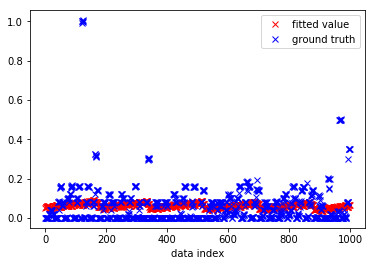

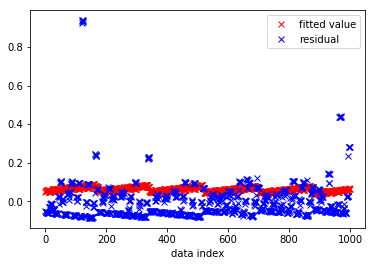

In [6]:
# basic linear model -- results and plots
allpre_res = [None for i in range(len(data))]
model_building(scaler_enc_data.values,allpre_res)
#print(allpre_res)
two_plots(allpre_res, pre_gt)

## Data Preprocessing

the last fold of coefficients are: 
 [ -1.93492276e-04  -4.96017383e-03   9.49909836e-03   2.89805442e-03
  -2.64365378e-06]
training RMSE: 0.103585 testing RMSE: 0.103676


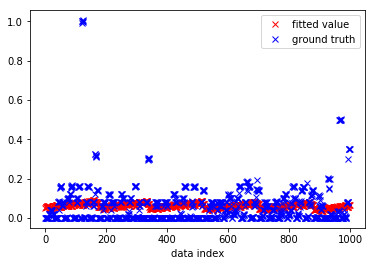

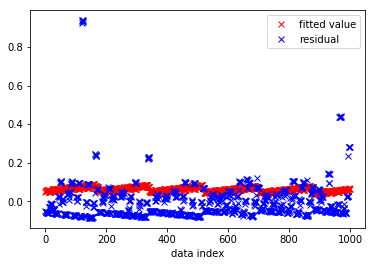

In [7]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
basic_model_data = scaler_enc_data
standard_data = scaler.fit_transform(basic_model_data)


model_building(standard_data, allpre_res)
two_plots(allpre_res, pre_gt)


## Feature Selection

selected features are: ['Day of Week', 'Backup Start Time - Hour of Day', 'Work-Flow-ID']
[[-1.51932107 -1.455772   -1.42689367]
 [-1.51932107 -1.455772   -0.0139109 ]
 [-1.51932107 -1.455772   -0.0139109 ]
 ..., 
 [ 1.48761463  1.47082378  1.39907186]
 [ 1.48761463  1.47082378  1.39907186]
 [ 1.48761463  1.47082378  1.39907186]]
the last fold of coefficients are: 
 [-0.00495061  0.00950047  0.00289556]
training RMSE: 0.103586 testing RMSE: 0.103671


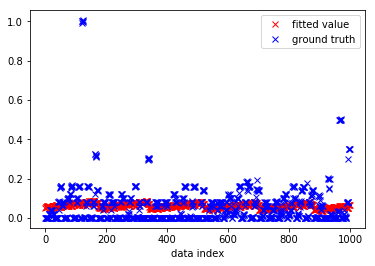

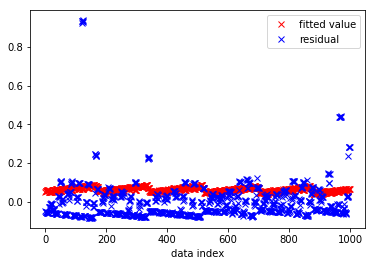

selected features are: ['Backup Start Time - Hour of Day', 'Work-Flow-ID', 'File Name']
[[-1.455772   -1.42689367 -1.68739471]
 [-1.455772   -0.0139109  -0.30219057]
 [-1.455772   -0.0139109  -0.18675689]
 ..., 
 [ 1.47082378  1.39907186  1.31388094]
 [ 1.47082378  1.39907186  1.19844726]
 [ 1.47082378  1.39907186  1.08301358]]
the last fold of coefficients are: 
 [  9.47536291e-03   2.97494349e-03  -1.74087844e-06]
training RMSE: 0.103695 testing RMSE: 0.103772


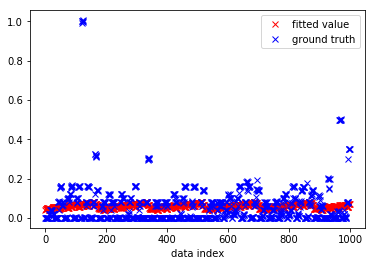

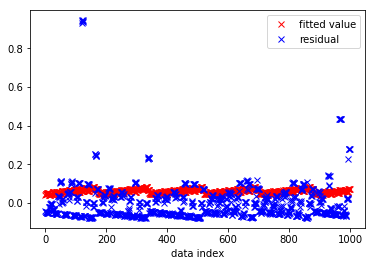

In [8]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from sklearn.feature_selection import mutual_info_regression
all_features = ['Week #', 'Day of Week', 'Backup Start Time - Hour of Day', 'Work-Flow-ID', 'File Name']
# apply f_regression
allpre_res = [None for i in range(len(data))]
best_3 = SelectKBest(score_func = f_regression, k = 3)
X_f_select = best_3.fit_transform(standard_data, pre_gt)
mask = best_3.get_support()
print ("selected features are:", list(filter(lambda s: mask[all_features.index(s)], all_features)))
print(X_f_select)
model_building(X_f_select, allpre_res)
two_plots(allpre_res, pre_gt)

#apply mutual_info_regression
allpre_res = [None for i in range(len(data))]
best_3 = SelectKBest(score_func = mutual_info_regression, k = 3)
X_mu_select = best_3.fit_transform(standard_data, pre_gt)
mask = best_3.get_support()
print ("selected features are:", list(filter(lambda s: mask[all_features.index(s)], all_features)))
print(X_mu_select)
model_building(X_mu_select, allpre_res)
two_plots(allpre_res, pre_gt)

## Feature Encoding

combinition 1:
the dim of the current data is 5
the last fold of coefficients are: 
 [ -4.47872780e-05  -2.48582063e-03   1.39000106e-03   2.04745048e-03
  -3.05166682e-07]
training RMSE: 0.103585 testing RMSE: 0.103676
combinition 2:
the dim of the current data is 19
the last fold of coefficients are: 
 [  5.01082851e+10   5.01082851e+10   5.01082851e+10   5.01082851e+10
   5.01082851e+10   5.01082851e+10   5.01082851e+10   5.01082851e+10
   5.01082851e+10   5.01082851e+10   5.01082851e+10   5.01082851e+10
   5.01082851e+10   5.01082851e+10   6.63644918e-09  -2.56055275e-03
   1.39382513e-03   2.05739727e-03  -3.60686891e-06]
training RMSE: 0.103581 testing RMSE: 23669982730.007435
combinition 3:
the dim of the current data is 11
the last fold of coefficients are: 
 [  3.99107122e-02  -1.32222361e-02  -2.04232090e-02  -5.73594384e-03
  -5.13812681e-03   3.21834913e-03   1.39045448e-03   1.09857967e-05
   1.40628001e-03   2.10140508e-03  -4.04342815e-07]
training RMSE: 0.102150 testing

the last fold of coefficients are: 
 [  7.45880143e+10   7.45880143e+10   7.45880143e+10   7.45880143e+10
   7.45880143e+10   7.45880143e+10   7.45880143e+10   7.45880143e+10
   7.45880143e+10   7.45880143e+10   7.45880143e+10   7.45880143e+10
   7.45880143e+10   7.45880143e+10   1.77635684e-15   4.01738835e-02
  -1.34889778e-02  -1.98215595e-02  -5.15157518e-03  -4.79493657e-03
   3.72553463e-03   1.89857712e-03  -2.01020779e-02  -2.05873658e-02
   7.26877214e-03   3.41953676e-02  -3.26308692e-03   2.92389237e-03
   2.26219083e-03  -4.03637750e-06]
training RMSE: 0.100905 testing RMSE: 41339468724.882698
combinition 18:
the dim of the current data is 29
the last fold of coefficients are: 
 [  7.88727617e+10   7.88727617e+10   7.88727617e+10   7.88727617e+10
   7.88727617e+10   7.88727617e+10   7.88727617e+10   7.88727617e+10
   7.88727617e+10   7.88727617e+10   7.88727617e+10   7.88727617e+10
   7.88727617e+10   7.88727617e+10   1.49198114e+08  -4.46412844e+09
  -4.46412844e+09  -4.46

the last fold of coefficients are: 
 [  6.12908998e+10   6.12908998e+10   6.12908998e+10   6.12908998e+10
   6.12908998e+10   6.12908998e+10   6.12908998e+10   6.12908998e+10
   6.12908998e+10   6.12908998e+10   6.12908998e+10   6.12908998e+10
   6.12908998e+10   6.12908998e+10  -3.05442062e+11  -2.05521817e+11
  -2.05521817e+11  -2.05521817e+11  -2.05521817e+11  -2.05521817e+11
  -2.05521817e+11  -2.05521817e+11  -2.72037655e+11  -2.72037655e+11
  -2.72037655e+11  -2.72037655e+11  -2.72037655e+11  -2.72037655e+11
  -2.55764937e+10  -2.55764937e+10  -2.55764937e+10  -2.55764937e+10
  -2.55764937e+10  -2.55764937e+10  -1.77826663e+10  -1.77826663e+10
  -1.77826663e+10  -1.77826663e+10  -1.77826663e+10  -1.77826663e+10
  -9.98883881e+09  -9.98883881e+09  -9.98883881e+09  -9.98883881e+09
  -9.98883881e+09  -9.98883881e+09  -2.19501135e+09  -2.19501135e+09
  -2.19501135e+09  -2.19501135e+09  -2.19501135e+09  -2.19501135e+09
   5.59881612e+09   5.59881612e+09   5.59881612e+09   5.59881612e+

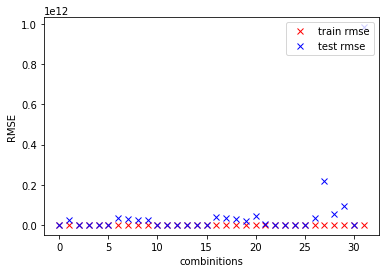

In [14]:
from sklearn.preprocessing import OneHotEncoder
from itertools import combinations

one_hot_enc_index = [0,1,2,3,4] 

feature_combi = []  # each tuple stores the feature that needs to be ont-hot-encoded 
for i in range(len(one_hot_enc_index) + 1):  
    feature_combi += list(combinations(one_hot_enc_index, i))  
#print (feature_combi)  

scaler_data = scaler_enc_data # already do the scaler encoding

RMSE_train_32 = []
RMSE_test_32 = []
pre_res_32 = []
roundnum = 1
# start 32 iteration loop
for comb in feature_combi:
    enc = OneHotEncoder(categorical_features = list(comb), sparse = False)
    mix_data = enc.fit_transform(scaler_data.values)
    allpre_res = [None for i in range(len(data))]
    print("combinition %d:" %roundnum)
    print("the dim of the current data is %d" %len(mix_data[1]))
    rmse1, rmse2 = model_building(mix_data, allpre_res)
    roundnum += 1
    RMSE_train_32.append(rmse1)
    RMSE_test_32.append(rmse2)
    pre_res_32.append(allpre_res)
    '''
    for i in range(len(test_index)):
        allpre_res[test_index[i]] = test_pred_y[i]
    '''



def plot_RMSE():
    x = np.arange(0,32)
    y1 = RMSE_train_32
    y2 = RMSE_test_32
    fig = plt.figure()  
    l1, = plt.plot(x, y1, 'rx', label='train rmse')
    l2, = plt.plot(x, y2, 'bx', label='test rmse')
    plt.legend(loc='upper right')
    plt.xlabel('combinitions')
    plt.ylabel('RMSE')
    plt.show()

plot_RMSE()

In [15]:
print(len(pre_res_32))

32


(1, 2, 3)


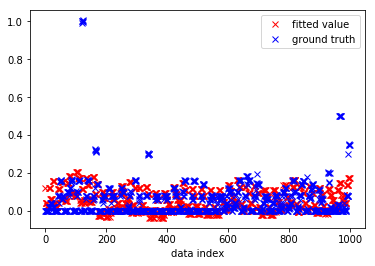

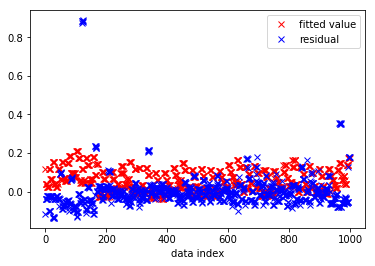

[ -2.12606591e+11   2.47351582e+10   2.47351582e+10   2.47351582e+10
   2.47351582e+10   2.47351582e+10   2.47351582e+10   2.47351582e+10
   2.47351582e+10   2.47351582e+10   2.47351582e+10   2.47351582e+10
   2.47351582e+10   2.47351582e+10   2.47351582e+10  -6.42708829e+10
  -6.42708829e+10  -6.42708829e+10  -6.42708829e+10  -6.42708829e+10
  -6.42708829e+10  -6.42708829e+10  -3.60564139e+11  -3.60564139e+11
  -3.60564139e+11  -3.60564139e+11  -3.60564139e+11  -3.60564139e+11
   1.51544933e+12   3.97350822e+11   1.08947505e+12   8.34095003e+11
   9.97531997e+11  -4.94212049e+11  -4.94212049e+11  -4.94212049e+11
  -4.94212049e+11  -4.94212049e+11  -4.94212049e+11   6.23886461e+11
   6.23886461e+11   6.23886461e+11   6.23886461e+11   6.23886461e+11
   6.23886461e+11  -6.82377650e+10  -6.82377650e+10  -6.82377650e+10
  -6.82377650e+10  -6.82377650e+10  -6.82377650e+10   1.87142280e+11
   1.87142280e+11   1.87142280e+11   1.87142280e+11   1.87142280e+11
   1.87142280e+11   2.37052860e+10

In [16]:
# best results for 32 feature combinition
# feature 1,2,3 (Day of Week,Backup Start Time - Hour of Day, Work-Flow-ID) has done the ont hot encoding

print(feature_combi[22])
two_plots(pre_res_32[22], pre_gt)


#pre_res_32 = [None for i in range(len(data))]
enc2 = OneHotEncoder(categorical_features = [1,2,3], sparse = False)
selected_data = enc.fit_transform(scaler_data.values)
kf = KFold(n_splits = 10, random_state = None, shuffle = False)
    
for train_index, test_index in kf.split(selected_data):

    X_train, X_test = selected_data[train_index], selected_data[test_index]
    y_train, y_test = pre_gt[train_index], pre_gt[test_index]
    #print(type(y_train))
    # Create linear regression object
    regr = linear_model.LinearRegression()            
    # Train the model using the training sets
    regr.fit(X_train, y_train)
    print(regr.coef_ )
    # Make predictions using the training set
    train_pred_y = regr.predict(X_train)
    # Make predictions using the testing set
    test_pred_y = regr.predict(X_test)





(0, 1, 2, 3, 4)


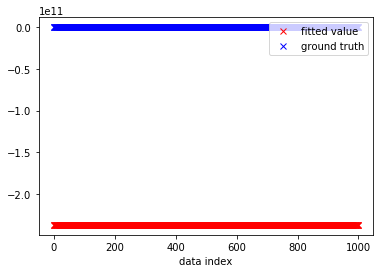

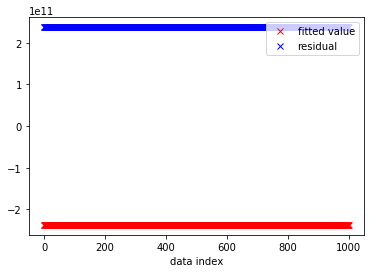

[ -2.12606591e+11   2.47351582e+10   2.47351582e+10   2.47351582e+10
   2.47351582e+10   2.47351582e+10   2.47351582e+10   2.47351582e+10
   2.47351582e+10   2.47351582e+10   2.47351582e+10   2.47351582e+10
   2.47351582e+10   2.47351582e+10   2.47351582e+10  -6.42708829e+10
  -6.42708829e+10  -6.42708829e+10  -6.42708829e+10  -6.42708829e+10
  -6.42708829e+10  -6.42708829e+10  -3.60564139e+11  -3.60564139e+11
  -3.60564139e+11  -3.60564139e+11  -3.60564139e+11  -3.60564139e+11
   1.51544933e+12   3.97350822e+11   1.08947505e+12   8.34095003e+11
   9.97531997e+11  -4.94212049e+11  -4.94212049e+11  -4.94212049e+11
  -4.94212049e+11  -4.94212049e+11  -4.94212049e+11   6.23886461e+11
   6.23886461e+11   6.23886461e+11   6.23886461e+11   6.23886461e+11
   6.23886461e+11  -6.82377650e+10  -6.82377650e+10  -6.82377650e+10
  -6.82377650e+10  -6.82377650e+10  -6.82377650e+10   1.87142280e+11
   1.87142280e+11   1.87142280e+11   1.87142280e+11   1.87142280e+11
   1.87142280e+11   2.37052860e+10

In [18]:
# worst results for 32 feature combinition
# feature 1,2,3,4,5 (Day of Week,Backup Start Time - Hour of Day, Work-Flow-ID) has done the one hot encoding
print(feature_combi[31])
two_plots(pre_res_32[31], pre_gt)

enc2 = OneHotEncoder(categorical_features = [0,1,2,3,4], sparse = False)
selected_data = enc.fit_transform(scaler_data.values)
kf = KFold(n_splits = 10, random_state = None, shuffle = False)
    
for train_index, test_index in kf.split(selected_data):

    X_train, X_test = selected_data[train_index], selected_data[test_index]
    y_train, y_test = pre_gt[train_index], pre_gt[test_index]
    #print(type(y_train))
    # Create linear regression object
    regr = linear_model.LinearRegression()            
    # Train the model using the training sets
    regr.fit(X_train, y_train)
    print(regr.coef_ )
    # Make predictions using the training set
    train_pred_y = regr.predict(X_train)
    # Make predictions using the testing set
    test_pred_y = regr.predict(X_test)

## Controlling ill-conditioning and over-fiting

In [19]:
# ridge resgression
from sklearn.linear_model import Ridge

def ridge_regression(dataset, alpha):

    train_RMSE = []
    test_RMSE = []

    kf = KFold(n_splits = 10, random_state = None, shuffle = False)
    #allpre_res = [None for i in range(len(dataset))]
    
    for train_index, test_index in kf.split(dataset):
        X_train, X_test = dataset[train_index], dataset[test_index]
        y_train, y_test = pre_gt[train_index], pre_gt[test_index]
        ridgereg = Ridge(alpha = alpha, normalize = True)
        ridgereg.fit(X_train, y_train)
        # Make predictions using the training set
        train_pred_y = ridgereg.predict(X_train)
        # Make predictions using the testing set
        test_pred_y = ridgereg.predict(X_test)
    
        # RMSE in train set
        train_RMSE.append(mean_squared_error(y_train, train_pred_y))
        # RMSE in test set
        test_RMSE.append(mean_squared_error(y_test, test_pred_y))
    print("training RMSE: %f" %sqrt(np.mean(train_RMSE)), "testing RMSE: %f" %sqrt(np.mean(test_RMSE)))
    return sqrt(np.mean(train_RMSE)), sqrt(np.mean(test_RMSE))

alpha_ridge = [1e-3,1e-2, 1, 5, 10]
count = 1

best_model = [[],[],[],[],[]]#best model for specific parameter
for comb in feature_combi:
    enc = OneHotEncoder(categorical_features = list(comb), sparse = False)
    mix_data2 = enc.fit_transform(scaler_data.values)
    print("combination %d:" %count)
    count += 1
    for i in range(5):
        train_rmse, test_rmse = ridge_regression(mix_data2, alpha_ridge[i])
        best_model[i].append(test_rmse)


combination 1:
training RMSE: 0.103585 testing RMSE: 0.103676
training RMSE: 0.103585 testing RMSE: 0.103675
training RMSE: 0.103726 testing RMSE: 0.103782
training RMSE: 0.103991 testing RMSE: 0.104014
training RMSE: 0.104075 testing RMSE: 0.104088
combination 2:
training RMSE: 0.103580 testing RMSE: 0.114009
training RMSE: 0.103580 testing RMSE: 0.113833
training RMSE: 0.103723 testing RMSE: 0.106632
training RMSE: 0.103990 testing RMSE: 0.104355
training RMSE: 0.104074 testing RMSE: 0.104192
combination 3:
training RMSE: 0.102150 testing RMSE: 0.102232
training RMSE: 0.102150 testing RMSE: 0.102231
training RMSE: 0.102600 testing RMSE: 0.102655
training RMSE: 0.103504 testing RMSE: 0.103528
training RMSE: 0.103794 testing RMSE: 0.103808
combination 4:
training RMSE: 0.102361 testing RMSE: 0.102465
training RMSE: 0.102361 testing RMSE: 0.102465
training RMSE: 0.102737 testing RMSE: 0.102801
training RMSE: 0.103546 testing RMSE: 0.103572
training RMSE: 0.103815 testing RMSE: 0.103831


In [20]:
# best model index for 5 parameters under ridge
# best results they get
best_model_index = []
for i in range(5):
    best_model_index.append(best_model[i].index(min(best_model[i])))
    print(min(best_model[i]))
    
print(best_model_index)

0.08850414983576227
0.08850425131632048
0.09045556403567528
0.09678642488453743
0.09959383233711219
[22, 22, 30, 30, 30]


In [21]:
# combination 23 (index 22) with ridge parameter 1e-3
kf = KFold(n_splits = 10, random_state = None, shuffle = False)
enc = OneHotEncoder(categorical_features = [1,2,3], sparse = False)
selected_data2 = enc.fit_transform(scaler_data.values)
ridgereg = Ridge(alpha = 1e-3, normalize = True)  
train_RMSE = []
test_RMSE = []
for train_index, test_index in kf.split(selected_data2):
    X_train, X_test = selected_data2[train_index], selected_data2[test_index]
    y_train, y_test = pre_gt[train_index], pre_gt[test_index]

    ridgereg.fit(X_train, y_train)
    # Make predictions using the training set
    train_pred_y = ridgereg.predict(X_train)
    # Make predictions using the testing set
    test_pred_y = ridgereg.predict(X_test)
    
    # RMSE in train set
    train_RMSE.append(mean_squared_error(y_train, train_pred_y))
    # RMSE in test set
    test_RMSE.append(mean_squared_error(y_test, test_pred_y))
print(ridgereg.coef_)
print("training RMSE: %f" %sqrt(np.mean(train_RMSE)), "testing RMSE: %f" %sqrt(np.mean(test_RMSE)))

[  3.93103129e-02  -1.27151247e-02  -2.02468694e-02  -5.51483963e-03
  -5.63833858e-03   3.37493578e-03   1.54861201e-03  -2.03442446e-02
  -2.10396990e-02   7.06775441e-03   3.40030718e-02  -2.35777969e-03
   2.31002130e-03   3.89609955e-02  -1.23501920e-02  -4.08014922e-02
  -5.69665137e-02   7.11828450e-02   1.16798915e-05   1.01744435e-05]
training RMSE: 0.088337 testing RMSE: 0.088504


In [22]:
# lasso regression
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold
from math import sqrt
from sklearn.linear_model import Lasso
def lasso_regression(dataset, alpha):
    train_RMSE = []
    test_RMSE = []

    kf = KFold(n_splits = 10, random_state = None, shuffle = False)
    #allpre_res = [None for i in range(len(dataset))]
    
    for train_index, test_index in kf.split(dataset):
        X_train, X_test = dataset[train_index], dataset[test_index]
        y_train, y_test = pre_gt[train_index], pre_gt[test_index]
        lassoreg = Lasso(alpha = alpha,normalize = False, max_iter=1e5)
        lassoreg.fit(X_train,y_train)
        # Make predictions using the training set
        train_pred_y = lassoreg.predict(X_train)
        # Make predictions using the testing set
        test_pred_y = lassoreg.predict(X_test)
    
        # RMSE in train set
        train_RMSE.append(mean_squared_error(y_train, train_pred_y))
        # RMSE in test set
        test_RMSE.append(mean_squared_error(y_test, test_pred_y))
    print("training RMSE: %f" %sqrt(np.mean(train_RMSE)), "testing RMSE: %f" %sqrt(np.mean(test_RMSE)))
    return sqrt(np.mean(train_RMSE)), sqrt(np.mean(test_RMSE))


alpha_lasso = [1e-3,1e-2, 1, 5, 10]

count = 1
best_model = [[],[],[],[],[]]#best model for specific parameter
for comb in feature_combi:
    enc = OneHotEncoder(categorical_features = list(comb), sparse = False)
    mix_data3 = enc.fit_transform(scaler_data.values)
    
    print("combination %d:" %count)
    #print(mix_data[45])
    count += 1
    for i in range(5):
        train_rmse, test_rmse = lasso_regression(mix_data3, alpha_lasso[i])
        best_model[i].append(test_rmse)



combination 1:
training RMSE: 0.103589 testing RMSE: 0.103672
training RMSE: 0.103714 testing RMSE: 0.103789
training RMSE: 0.104190 testing RMSE: 0.104190
training RMSE: 0.104190 testing RMSE: 0.104190
training RMSE: 0.104190 testing RMSE: 0.104190
combination 2:
training RMSE: 0.103589 testing RMSE: 0.103671
training RMSE: 0.103714 testing RMSE: 0.103789
training RMSE: 0.104190 testing RMSE: 0.104190
training RMSE: 0.104190 testing RMSE: 0.104190
training RMSE: 0.104190 testing RMSE: 0.104190
combination 3:
training RMSE: 0.102307 testing RMSE: 0.102388
training RMSE: 0.103714 testing RMSE: 0.103789
training RMSE: 0.104190 testing RMSE: 0.104190
training RMSE: 0.104190 testing RMSE: 0.104190
training RMSE: 0.104190 testing RMSE: 0.104190
combination 4:
training RMSE: 0.102495 testing RMSE: 0.102587
training RMSE: 0.104122 testing RMSE: 0.104194
training RMSE: 0.104190 testing RMSE: 0.104190
training RMSE: 0.104190 testing RMSE: 0.104190
training RMSE: 0.104190 testing RMSE: 0.104190


In [23]:
best_model_index = []
for i in range(5):
    best_model_index.append(best_model[i].index(min(best_model[i])))
    print(min(best_model[i]))
    
print(best_model_index)

0.08893870957306774
0.09897362685525399
0.10419023788428683
0.10419023788428683
0.10419023788428683
[31, 4, 0, 0, 0]


In [24]:
# combination 32 (index 31) with lasso parameter 1e-3
kf = KFold(n_splits = 10, random_state = None, shuffle = False)
enc = OneHotEncoder(categorical_features = [0,1,2,3,4], sparse = False)
selected_data3 = enc.fit_transform(scaler_data.values)
lassoreg = Lasso(alpha = 1e-3,normalize = False, max_iter=1e5)
train_RMSE = []
test_RMSE = []
for train_index, test_index in kf.split(selected_data3):
    X_train, X_test = selected_data3[train_index], selected_data3[test_index]
    y_train, y_test = pre_gt[train_index], pre_gt[test_index]

    lassoreg.fit(X_train, y_train)
    # Make predictions using the training set
    train_pred_y = lassoreg.predict(X_train)
    # Make predictions using the testing set
    test_pred_y = lassoreg.predict(X_test)
    
    # RMSE in train set
    train_RMSE.append(mean_squared_error(y_train, train_pred_y))
    # RMSE in test set
    test_RMSE.append(mean_squared_error(y_test, test_pred_y))
print(lassoreg.coef_)
print("training RMSE: %f" %sqrt(np.mean(train_RMSE)), "testing RMSE: %f" %sqrt(np.mean(test_RMSE)))

[-0.          0.          0.         -0.          0.         -0.          0.
  0.          0.          0.         -0.          0.         -0.         -0.
  0.          0.03593511 -0.00210386 -0.01025112 -0.         -0.          0.
  0.         -0.01451855 -0.01481428  0.00117583  0.02810024 -0.          0.
  0.04624227 -0.         -0.02369402 -0.03985359  0.07862426  0.          0.
  0.          0.          0.          0.          0.         -0.          0.
 -0.         -0.         -0.         -0.         -0.         -0.         -0.
 -0.         -0.         -0.         -0.         -0.         -0.         -0.
 -0.          0.          0.          0.          0.          0.          0.        ]
training RMSE: 0.088775 testing RMSE: 0.088939


In [25]:
# elastic net
# get same results in all the parameters and feature combinitions
from sklearn.linear_model import ElasticNet

def ElasticNet_regression(dataset, l1_ratio):
    #Fit the model
    
    
    train_RMSE = []
    test_RMSE = []

    kf = KFold(n_splits = 10, random_state = None, shuffle = False)
    #allpre_res = [None for i in range(len(dataset))]
    
    for train_index, test_index in kf.split(dataset):
        X_train, X_test = dataset[train_index], dataset[test_index]
        y_train, y_test = pre_gt[train_index], pre_gt[test_index]
        
        elasticreg = ElasticNet(random_state=0, l1_ratio = l1_ratio)
        elasticreg.fit(X_train,y_train)
        # Make predictions using the training set
        train_pred_y = elasticreg.predict(X_train)
        # Make predictions using the testing set
        test_pred_y = elasticreg.predict(X_test)  
        # RMSE in train set
        train_RMSE.append(mean_squared_error(y_train, train_pred_y))
        # RMSE in test set
        test_RMSE.append(mean_squared_error(y_test, test_pred_y))
    print("training RMSE: %f" %sqrt(np.mean(train_RMSE)), "testing RMSE: %f" %sqrt(np.mean(test_RMSE)))
    print("the last fold coefficient are: \n", elasticreg.coef_)
    return sqrt(np.mean(train_RMSE)), sqrt(np.mean(test_RMSE))

count = 1
l1_ratio = [0.1, 0.2, 0.3, 0.5, 0.9]
best_model = [[],[],[],[],[]]
for comb in feature_combi:
    enc = OneHotEncoder(categorical_features = list(comb), sparse = False)
    mix_data4 = enc.fit_transform(scaler_data.values)
    
    print("combination %d:" %count)
    #print(mix_data4[45])
    count += 1
    for i in range(5):
        train_rmse, test_rmse = ElasticNet_regression(mix_data4, l1_ratio[i])
        best_model[i].append(test_rmse)


combination 1:
training RMSE: 0.104190 testing RMSE: 0.104190
the last fold coefficient are: 
 [ 0. -0.  0.  0.  0.]
training RMSE: 0.104190 testing RMSE: 0.104190
the last fold coefficient are: 
 [ 0. -0.  0.  0.  0.]
training RMSE: 0.104190 testing RMSE: 0.104190
the last fold coefficient are: 
 [ 0. -0.  0.  0.  0.]
training RMSE: 0.104190 testing RMSE: 0.104190
the last fold coefficient are: 
 [ 0. -0.  0.  0.  0.]
training RMSE: 0.104190 testing RMSE: 0.104190
the last fold coefficient are: 
 [ 0. -0.  0.  0.  0.]
combination 2:
training RMSE: 0.104190 testing RMSE: 0.104190
the last fold coefficient are: 
 [-0. -0.  0. -0.  0. -0.  0.  0.  0.  0. -0.  0. -0. -0.  0. -0.  0.  0.
  0.]
training RMSE: 0.104190 testing RMSE: 0.104190
the last fold coefficient are: 
 [-0. -0.  0. -0.  0. -0.  0.  0.  0.  0. -0.  0. -0. -0.  0. -0.  0.  0.
  0.]
training RMSE: 0.104190 testing RMSE: 0.104190
the last fold coefficient are: 
 [-0. -0.  0. -0.  0. -0.  0.  0.  0.  0. -0.  0. -0. -0.  0. -

training RMSE: 0.104190 testing RMSE: 0.104190
the last fold coefficient are: 
 [ 0. -0. -0. -0. -0.  0.  0. -0. -0.  0.  0. -0.  0.  0.  0.  0.]
training RMSE: 0.104190 testing RMSE: 0.104190
the last fold coefficient are: 
 [ 0. -0. -0. -0. -0.  0.  0. -0. -0.  0.  0. -0.  0.  0.  0.  0.]
combination 12:
training RMSE: 0.104190 testing RMSE: 0.104190
the last fold coefficient are: 
 [ 0. -0. -0. -0. -0.  0.  0.  0. -0. -0. -0.  0.  0.  0.  0.]
training RMSE: 0.104190 testing RMSE: 0.104190
the last fold coefficient are: 
 [ 0. -0. -0. -0. -0.  0.  0.  0. -0. -0. -0.  0.  0.  0.  0.]
training RMSE: 0.104190 testing RMSE: 0.104190
the last fold coefficient are: 
 [ 0. -0. -0. -0. -0.  0.  0.  0. -0. -0. -0.  0.  0.  0.  0.]
training RMSE: 0.104190 testing RMSE: 0.104190
the last fold coefficient are: 
 [ 0. -0. -0. -0. -0.  0.  0.  0. -0. -0. -0.  0.  0.  0.  0.]
training RMSE: 0.104190 testing RMSE: 0.104190
the last fold coefficient are: 
 [ 0. -0. -0. -0. -0.  0.  0.  0. -0. -0. -0.

training RMSE: 0.104190 testing RMSE: 0.104190
the last fold coefficient are: 
 [-0. -0.  0. -0.  0. -0.  0.  0.  0.  0. -0.  0. -0. -0.  0.  0. -0. -0.
 -0. -0.  0.  0.  0.  0.  0.  0.  0.  0. -0. -0. -0. -0. -0. -0. -0. -0.
 -0. -0. -0. -0. -0. -0. -0. -0. -0. -0.  0.  0.  0.  0.  0.  0.  0.  0.]
combination 20:
training RMSE: 0.104190 testing RMSE: 0.104190
the last fold coefficient are: 
 [-0. -0.  0. -0.  0. -0.  0.  0.  0.  0. -0.  0. -0. -0.  0. -0. -0.  0.
  0. -0.  0.  0. -0. -0. -0.  0. -0.  0.]
training RMSE: 0.104190 testing RMSE: 0.104190
the last fold coefficient are: 
 [-0. -0.  0. -0.  0. -0.  0.  0.  0.  0. -0.  0. -0. -0.  0. -0. -0.  0.
  0. -0.  0.  0. -0. -0. -0.  0. -0.  0.]
training RMSE: 0.104190 testing RMSE: 0.104190
the last fold coefficient are: 
 [-0. -0.  0. -0.  0. -0.  0.  0.  0.  0. -0.  0. -0. -0.  0. -0. -0.  0.
  0. -0.  0.  0. -0. -0. -0.  0. -0.  0.]
training RMSE: 0.104190 testing RMSE: 0.104190
the last fold coefficient are: 
 [-0. -0.  0. -0.  0

training RMSE: 0.104190 testing RMSE: 0.104190
the last fold coefficient are: 
 [-0. -0.  0.  0. -0.  0.  0. -0. -0. -0.  0.  0.  0.  0.  0.  0.  0. -0.
 -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0.  0.
  0.  0.  0.  0.  0.  0. -0.]
training RMSE: 0.104190 testing RMSE: 0.104190
the last fold coefficient are: 
 [-0. -0.  0.  0. -0.  0.  0. -0. -0. -0.  0.  0.  0.  0.  0.  0.  0. -0.
 -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0.  0.
  0.  0.  0.  0.  0.  0. -0.]
combination 27:
training RMSE: 0.104190 testing RMSE: 0.104190
the last fold coefficient are: 
 [-0. -0.  0. -0.  0. -0.  0.  0.  0.  0. -0.  0. -0. -0.  0.  0. -0. -0.
 -0. -0.  0.  0. -0. -0.  0.  0. -0.  0.  0. -0. -0. -0.  0.  0.]
training RMSE: 0.104190 testing RMSE: 0.104190
the last fold coefficient are: 
 [-0. -0.  0. -0.  0. -0.  0.  0.  0.  0. -0.  0. -0. -0.  0.  0. -0. -0.
 -0. -0.  0.  0. -0. -0.  0.  0. -0.  0.  0. -0. -0. -0.  0.  0.]
training RMSE: 0.104190 testing RM

training RMSE: 0.104190 testing RMSE: 0.104190
the last fold coefficient are: 
 [-0. -0.  0. -0.  0. -0.  0.  0.  0.  0. -0.  0. -0. -0.  0.  0. -0. -0.
 -0. -0.  0.  0. -0. -0.  0.  0. -0.  0.  0. -0. -0. -0.  0.  0.  0.  0.
  0.  0.  0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0.
 -0. -0. -0.  0.  0.  0.  0.  0.  0.]
training RMSE: 0.104190 testing RMSE: 0.104190
the last fold coefficient are: 
 [-0. -0.  0. -0.  0. -0.  0.  0.  0.  0. -0.  0. -0. -0.  0.  0. -0. -0.
 -0. -0.  0.  0. -0. -0.  0.  0. -0.  0.  0. -0. -0. -0.  0.  0.  0.  0.
  0.  0.  0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0.
 -0. -0. -0.  0.  0.  0.  0.  0.  0.]
training RMSE: 0.104190 testing RMSE: 0.104190
the last fold coefficient are: 
 [-0. -0.  0. -0.  0. -0.  0.  0.  0.  0. -0.  0. -0. -0.  0.  0. -0. -0.
 -0. -0.  0.  0. -0. -0.  0.  0. -0.  0.  0. -0. -0. -0.  0.  0.  0.  0.
  0.  0.  0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0.
 -0. -0. -0.  0.  0.  0.  0

In [26]:
best_model_index = []
for i in range(5):
    best_model_index.append(best_model[i].index(min(best_model[i])))
    print(min(best_model[i]))
    
print(best_model_index)

0.10419023788428683
0.10419023788428683
0.10419023788428683
0.10419023788428683
0.10419023788428683
[0, 0, 0, 0, 0]
